-1

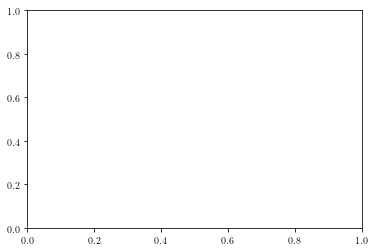

In [69]:
import numpy as np
import math as math
import matplotlib.pyplot as plt
from math import sqrt
from random import seed
from random import random
from time import time
import statistics as stat

duration = 10**2
ensemble_size = 10**4
number_of_time_lapses = duration
number_of_bins = number_of_time_lapses
bx = 1
by = 1

plt.rc('text', usetex=True)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
x = list(range(number_of_time_lapses))
y = list(range(number_of_time_lapses))
r = list(range(number_of_time_lapses))
x[0] = 0
y[0] = 0
datax = []
datay = []

def get_gyration_endtoend_radius(number_of_chains = 100,show = False):
    
    global datax 
    global datay
    global x,y,r
    global Rg,Rf
    Rg = list(range(ensemble_size))
    Rf = list(range(ensemble_size))
    x = list(range(number_of_chains))
    y = list(range(number_of_chains))
    r = list(range(number_of_chains))
    x[0] = 0
    y[0] = 0
    
    datax = []
    datay = []
    for _iter in range(ensemble_size):
        seed(_iter)
        for i in range(1,number_of_chains):
            b = random()
            x[i] = x[i-1] + (math.floor(b - 0.5) + math.ceil(b - 0.5))*bx
            datax.append(x[i])
            b = random()
            y[i] = y[i-1] + (math.floor(b - 0.5) + math.ceil(b - 0.5))*by
            datay.append(y[i])
            r[i] = sqrt(x[i]**2 + y[i] ** 2)
        Rg[_iter] = np.mean(r)
        Rf[_iter] = math.sqrt((x[number_of_chains-1] - x[1])**2+ (y[number_of_chains-1] - y[1])**2)

    Rg_mean = np.mean(Rg)
    Rf_mean = np.mean(Rf)
    print(Rg_mean)
    if (show == True):
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles[::-1],labels[::-1],title ='Peclet Numbers',loc = 'upper left')
        cord = np.empty((2,number_of_time_lapses))
        cord[0,:] = x
        cord[1,:] = y
    return (Rg_mean,Rf_mean)
#avg_dist = dist_tau/avg_count
#print(avg_dist)

In [38]:
get_gyration_radius(100)

8.252384971473909


8.252384971473909

Text(0, 0.5, '$P(x)$')

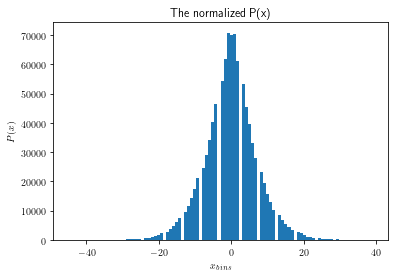

In [24]:
counts, bins = np.histogram(datay,bins = 100)

plt.hist(bins[:-1], bins, weights=counts)
plt.title("The normalized P(x)")
plt.xlabel("$x_{bins}$")
plt.ylabel("$P(x)$")

Text(0, 0.5, '$P(y)$')

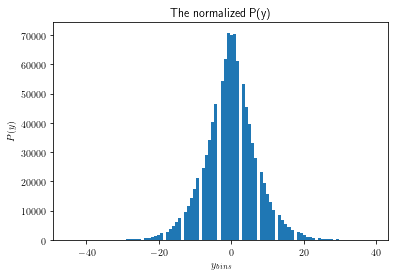

In [25]:
counts, bins = np.histogram(datay,bins = 100)

plt.hist(bins[:-1], bins, weights=counts)
plt.title("The normalized P(y)")
plt.xlabel("$y_{bins}$")
plt.ylabel("$P(y)$")

Text(0.5, 1.0, 'Polymer Simulation')

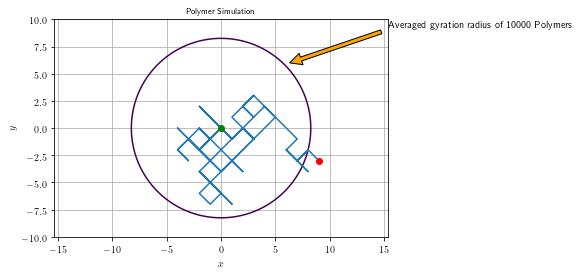

In [26]:

xlim = np.linspace(-10, 10, number_of_time_lapses)
ylim = np.linspace(-10, 10, number_of_time_lapses)
X, Y = np.meshgrid(xlim,ylim)
F = X**2 + Y**2 - Rg_mean**2

fig, ax = plt.subplots()
ax.contour(X,Y,F,[0])
ax.plot(cord[0],cord[1])
ax.plot(cord[0,0],cord[1,0], 'go')
ax.plot(cord[0,-1], cord[1,-1], 'ro')
demo = "Averaged gyration radius of "+str(ensemble_size)+" Polymers"
ax.annotate(demo, xy=(Rg_mean/sqrt(2), Rg_mean/sqrt(2)),  xycoords='data',
            xytext=(1, 1), textcoords='axes fraction',
            arrowprops=dict(facecolor='Orange', shrink=0.05),
            horizontalalignment='left', verticalalignment='top',
            )
ax.axis('equal')
ax.grid(True)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title('Polymer Simulation', fontsize=8)

In [72]:
N = [100 , 200 , 500, 1000]
Rg_N = []
Rf_N = []
for n in N:
    rg_N,rf_N = get_gyration_endtoend_radius(n,False)
    Rg_N.append(rg_N)
    Rf_N.append(rf_N)



8.252384971473909
11.766309151529997
18.696809732531307
26.404944880305447


0.5051488836008016 -0.21345903716451753


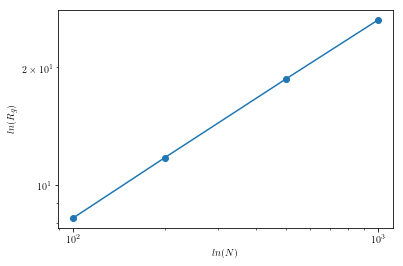

In [74]:
plt.loglog(N,Rg_N,"-o",)

plt.xlabel("$ln(N)$")
plt.ylabel("$ln(R_g)$")
m,n =  np.polyfit(np.log(N),np.log(Rg_N),1)

print (m , n)

0.5051126592035957 0.19131051072457983


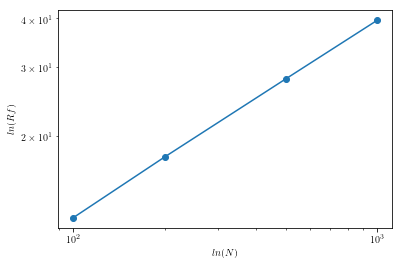

In [75]:
plt.loglog(N,Rf_N,"-o",)

plt.xlabel("$ln(N)$")
plt.ylabel("$ln(Rf)$")
m,n =  np.polyfit(np.log(N),np.log(Rf_N),1)

print (m , n)